Estimated wave speed c ≈ 1.886822344412084


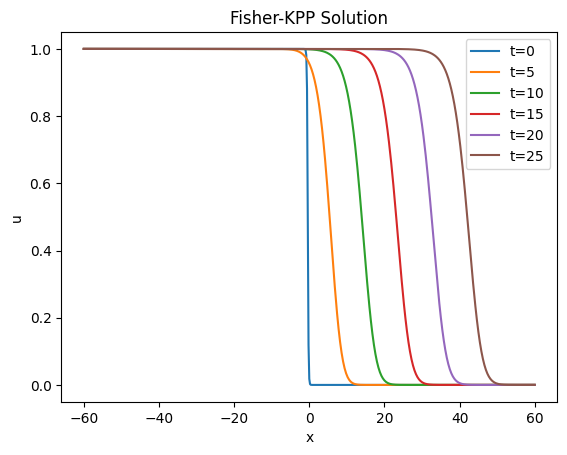

In [12]:
import numpy as np
import matplotlib.pyplot as plt


xL, xR = -60, 60
N = 600
dx = (xR - xL) / N
dt = 0.4 * dx**2      
T = 30
sigma = 10

x = np.linspace(xL, xR, N+1)

u = 1/(1 + np.exp((4 + x * sigma)))
#u = 0.5 * np.exp(-x**2 / (2*sigma))
#u = 1 / (1+np.exp(x/sigma))

times = []
front = []


t = 0
snapshots = {}

for step in range(int(T/dt)):
    
    if abs(t - round(t/5)*5) < dt:
        snapshots[round(t/5)*5] = u.copy()

   
    if u.max() > 0.5:
        idx = np.argmax(u <= 0.5)
        
        if idx > 0:
            x1, x2 = x[idx-1], x[idx]
            u1, u2 = u[idx-1], u[idx]
            xf = x1 + (0.5-u1)*(x2-x1)/(u2-u1)
        else:
            xf = x[0]
        times.append(t)
        front.append(xf)

    
    un = u.copy()
    lap = (un[2:] - 2*un[1:-1] + un[:-2]) / dx**2
    u[1:-1] = un[1:-1] + dt*(lap + un[1:-1]*(1-un[1:-1]))

    
    u[0] = u[1]
    u[-1] = u[-2]

    t += dt

# estimate c
times = np.array(times)
front = np.array(front)
mask = times > 10          
c_est = np.polyfit(times[mask], front[mask], 1)[0]

print("Estimated wave speed c ≈", abs(c_est))

# Plot
for k in sorted(snapshots.keys()):
    plt.plot(x, snapshots[k], label=f"t={k}")
plt.legend()
plt.xlabel("x")
plt.ylabel("u")
plt.title("Fisher-KPP Solution")
plt.show()


/var/folders/xd/6b7x17ts5b7612cqwyl3b63m0000gp/T/ipykernel_27521/143257922.py:6: RuntimeWarning: overflow encountered in exp
  u = 1/(1 + np.exp((4 + x * sigma)))


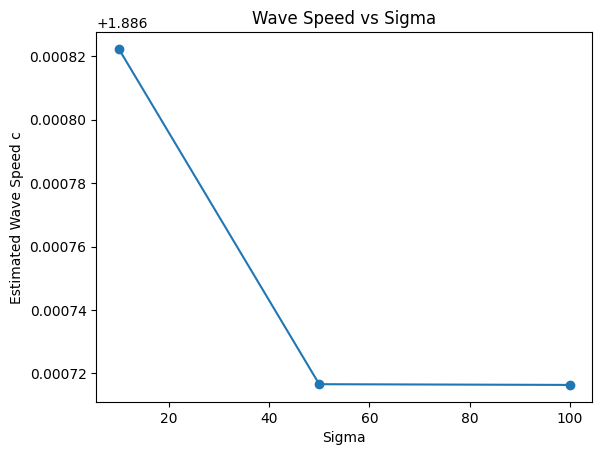

In [20]:
sigma_values = [10, 50, 100]

# plot wave speed vs sigma
speeds = []
for sigma in sigma_values:
    u = 1/(1 + np.exp((4 + x * sigma)))
    t = 0
    front = []
    times = []
    for step in range(int(T/dt)):
        if u.max() > 0.5:
            idx = np.argmax(u <= 0.5)
            if idx > 0:
                x1, x2 = x[idx-1], x[idx]
                u1, u2 = u[idx-1], u[idx]
                xf = x1 + (0.5-u1)*(x2-x1)/(u2-u1)
            else:
                xf = x[0]
            times.append(t)
            front.append(xf)
        un = u.copy()
        lap = (un[2:] - 2*un[1:-1] + un[:-2]) / dx**2
        u[1:-1] = un[1:-1] + dt*(lap + un[1:-1]*(1-un[1:-1]))
        u[0] = u[1]
        u[-1] = u[-2]
        t += dt
    times = np.array(times)
    front = np.array(front)
    mask = times > 10          
    c_est = np.polyfit(times[mask], front[mask], 1)[0]
    speeds.append(abs(c_est))   
plt.plot(sigma_values, speeds, marker='o')
plt.xlabel("Sigma")
plt.ylabel("Estimated Wave Speed c")
plt.title("Wave Speed vs Sigma")
plt.show()


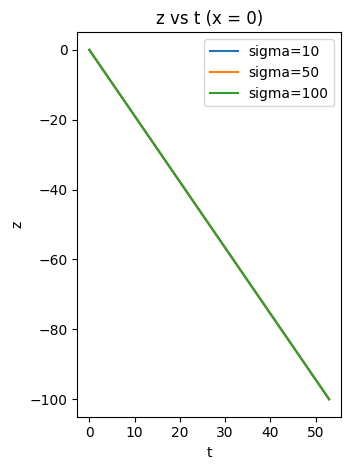

In [21]:
# plot z vs t
c = speeds[0]  # use the speed from the first sigma as an example
z_eval = np.linspace(-100, 0, 400)


plt.subplot(1,2,2)
for sigma in sigma_values:
    # same t(z) for all sigmas since t only depends on z
    t_vals = -z_eval / c
    plt.plot(t_vals, z_eval, label=f"sigma={sigma}")

plt.xlabel("t")
plt.ylabel("z")
plt.title("z vs t (x = 0)")
plt.legend()

plt.tight_layout()
plt.show()